In [355]:
%matplotlib inline
from copy import deepcopy as copy
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
from scipy import stats
import scipy.io as sio
import pandas as pd
from tqdm import tqdm
import pickle
from collections import OrderedDict
import os
from scipy.ndimage.interpolation import shift
from functools import reduce
import time

In [502]:
def calc_new_w(set_points, all_w, f_0, alpha, beta, gamma):
    w_in = 1.
    all_dw = np.zeros(len(all_w))
    f_in = f_0
    all_f = [f_0]
    
    for i, w in enumerate(all_w):
        f_curr = 2 * np.tanh(f_in * w)
        all_f.append(f_curr)
#         print((set_points[i] - f_curr))
#         print(beta * f_in * f_curr)
        dw_single = alpha * (set_points[i] - f_curr)
        if dw_single > 0:
            dw_single = 0
        dw = dw_single + beta * np.power(f_in * f_curr, gamma)
        f_in = f_curr
        all_dw[i] = dw
#     print('dw', dw.mean())
    return all_f, all_w + all_dw

In [506]:
alpha = 0.3
beta = 0.03
gamma = 1.3
set_points = np.ones(1000) * 0.75
f_0 = 1.5


(0.0, 2.0)

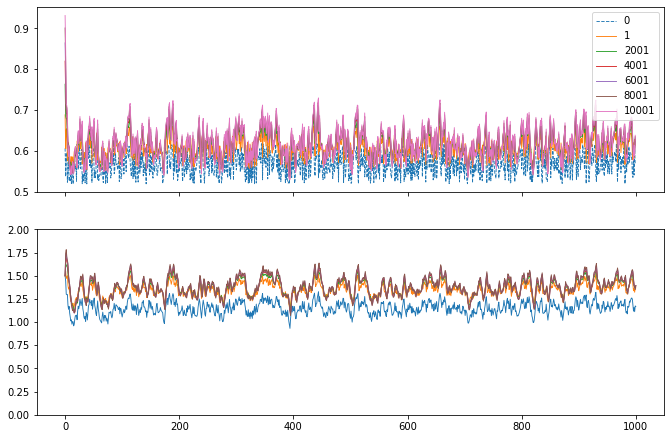

In [507]:
scale = 1.5
fig, axs = plt.subplots(2, 1, sharex=True, sharey=False, figsize=(7.5 * scale, 5 * scale))

w = np.ones(len(set_points)) * 0.52 + np.random.rand(len(set_points)) * 0.1
axs[0].plot(np.arange(len(w)), w, '--', lw=0.9, label=f'{0}')
f_initial, w_initial = calc_new_w(set_points, w, f_0, alpha, beta, gamma)
set_points = f_initial

for i in range(10001):
    if i % 2000 != 0:
        continue
    f, w = calc_new_w(set_points, w, f_0, alpha, beta, gamma)
#     print('w', w.mean())
    axs[0].plot(np.arange(len(w)), w, lw=0.9, label=f'{i+1}')
    axs[1].plot(np.arange(len(f)), f, lw=0.9, label=f'{i+1}')
axs[0].legend()
axs[1].set_ylim(0, 2)